<a href="https://colab.research.google.com/github/Sekarvrlz/ML04/blob/main/Modul_04_Unsupervised_Learning_122140108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load data dulu, misalnya iris = datasets.load_iris() ambil X = iris.data. Standardize pake StandardScaler(), terus PCA tinggal pca = PCA(n_components=2) lalu X_pca = pca.fit_transform(X_scaled). Visualisasi pake plt.scatter() buat tiap kelas. TruncatedSVD caranya sama, ganti aja jadi TruncatedSVD(n_components=2).

In [ ]:
# Memuat library yang dibutuhkan untuk pemrosesan data dan pengurangan dimensi
import sklearn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

Kode itu basically dipakai buat **ngambil dan liat isi awal dari dataset Iris**. Di baris `iris = datasets.load_iris()`, kita ngambil data bawaan  yang isinya info tentang bunga iris — kayak panjang dan lebar sepal sama petalnya. Terus datanya diubah jadi **DataFrame pandas** pakai `pd.DataFrame(...)` biar lebih gampang dibaca dan diolah. Nah, `df.head()` dipakai buat **nampilin 5 baris pertama** dari data itu, jadi kita bisa lihat dulu bentuk dan isinya sebelum lanjut analisis.


In [ ]:
# Memuat dataset yang digunakan untuk pemrosesan
iris = datasets.load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Kode di bawah ini dipakai buat normalisasi atau standarisasi data biar setiap fitur punya skala yang sama. Di baris scalar = StandardScaler(), kita bikin objek dari StandardScaler (dari sklearn) yang fungsinya buat ngubah data jadi punya rata-rata 0 dan standar deviasi 1. Terus, scalar.fit_transform(df) langsung ngelatih dan ngeubah data sekaligus, hasilnya dimasukin ke pd.DataFrame() biar bentuknya rapi kayak tabel lagi. Jadi intinya, scaled_data ini adalah versi data yang udah dinormalisasi, dan siap dipakai buat analisis atau algoritma machine learning yang sensitif sama skala data.

In [ ]:
# Melakukan normalisasi data dari setiap fitur
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(df)) #scaling the data
scaled_data

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


Kode di bawah ini dipakai buat **ngecek hubungan atau korelasi antar fitur** di dataset yang udah dinormalisasi tadi. Baris `corr = scaled_data.corr()` ngitung nilai korelasi antar kolom (fitur) di `scaled_data`, di mana nilainya bisa dari **-1 sampai 1** — makin deket ke 1 berarti hubungannya kuat dan searah, makin deket ke -1 berarti kuat tapi berlawanan arah. `print(corr)` cuma buat nampilin tabel korelasinya, sedangkan `sns.heatmap(scaled_data.corr())` dipakai buat **nampilin hasil korelasi itu dalam bentuk visual (heatmap)** biar lebih gampang dilihat pola-pola hubungan antar fitur.


          0         1         2         3
0  1.000000 -0.117570  0.871754  0.817941
1 -0.117570  1.000000 -0.428440 -0.366126
2  0.871754 -0.428440  1.000000  0.962865
3  0.817941 -0.366126  0.962865  1.000000


<Axes: >

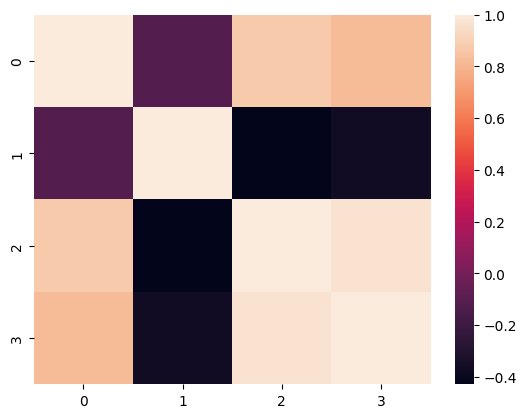

In [ ]:
# Mengecek korelasi antara fitur dari data
corr = scaled_data.corr()
print(corr)
sns.heatmap(scaled_data.corr())

Kode di bawah ini dipakai buat **nerapin PCA (Principal Component Analysis)** ke data yang udah dinormalisasi. Di baris `pca = PCA(n_components=3)`, kita bikin objek PCA dan nyetel supaya hasilnya cuma ngambil **3 komponen utama** aja — artinya dari banyak fitur awal, cuma diambil 3 fitur baru yang paling mewakili variasi datanya. Terus `pca.fit_transform(scaled_data)` dipakai buat **ngitung dan langsung ngubah datanya** ke bentuk baru berdasarkan komponen utama tadi. Hasilnya disimpen di `data_pca`, terus dibungkus lagi pakai `pd.DataFrame` biar rapi, dengan nama kolom `PC1`, `PC2`, dan `PC3`. Terakhir, `data_pca.head()` dipakai buat **ngeliat 5 baris pertama** dari hasil reduksi dimensi itu.


In [ ]:
# Menerapkan PCA dengan principal component sebanyak 3
pca = PCA(n_components = 3)
data_pca = pca.fit_transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

,PC1,PC2,PC3
0,-2.264703,0.480027,0.127706
1,-2.080961,-0.674134,0.234609
2,-2.364229,-0.341908,-0.044201
3,-2.299384,-0.597395,-0.091290
4,-2.389842,0.646835,-0.015738


Kode di bawah ini dipakai buat **ngeliat seberapa besar kontribusi tiap komponen utama (principal component)** dalam menjelaskan variasi data setelah PCA dilakukan. Pertama, `pca.explained_variance_ratio_.cumsum()` ngambil nilai **persentase total variansi** yang bisa dijelaskan oleh sejumlah komponen pertama, lalu disimpen di `list_explained_variance_pca`. Terus `label_x` dipakai buat ngasih label sumbu X sesuai jumlah komponennya. Setelah itu, bagian `plt.subplots()` sampai `plt.show()` digunakan buat **ngebuat grafik batang (bar chart)** yang nampilin hubungan antara **jumlah komponen** dan **nilai explained variance-nya**. Jadi, grafik ini bantu kita lihat berapa banyak komponen yang cukup dipakai tanpa kehilangan banyak informasi dari data aslinya.


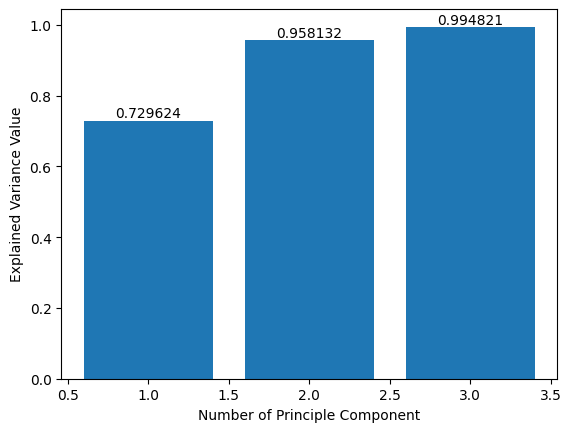

In [ ]:
 # Memetakan setiap nilai Explained Variance dari setiap jumlah principle component dalam grafik
 list_explained_variance_pca = pca.explained_variance_ratio_.cumsum()
 label_x = list(range(1, len(list_explained_variance_pca)+1))
 fig, ax = plt.subplots()
 bars = ax.bar(label_x, list_explained_variance_pca)
 ax.bar_label(bars, label_type='edge', color='black')
 ax.set_xlabel("Number of Principle Component")
 ax.set_ylabel("Explained Variance Value")
 plt.show()

Kode dibawah ini dipakai buat **ngelihat korelasi antar komponen PCA**. Lewat `sns.heatmap(data_pca.corr())`, kita bisa cek apakah **komponen utama saling independen** — idealnya nilai korelasinya kecil atau mendekati nol.

<Axes: >

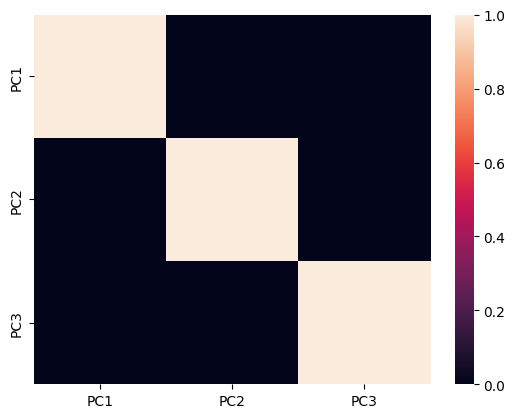

In [ ]:
 # Mengecek korelasi antara Principle Component, yang seharusnya memiliki nilai
 # korelasi yang kecil dari setiap principle component
 sns.heatmap(data_pca.corr())

Kode dibawah ini dipakai buat **nerapin SVD (Singular Value Decomposition)** guna **ngurangin dimensi data jadi 3 komponen utama**. Baris `svd = TruncatedSVD(n_components=3)` bikin objek SVD, lalu `svd.fit_transform(scaled_data)` ngubah data terstandarisasi jadi bentuk baru dengan 3 komponen. Hasilnya disimpen di `data_svd` dan dibungkus ulang ke **DataFrame** dengan kolom `PC1`, `PC2`, dan `PC3`. `data_svd.head()` dipakai buat **nampilin 5 baris pertama** dari hasil reduksi tersebut.

In [ ]:
 # Menerapkan SVD dengan pertimbangan penurunan komponen menjadi sebanyak 3
 svd = TruncatedSVD(n_components = 3)
 data_svd = svd.fit_transform(scaled_data)
 data_svd = pd.DataFrame(data_svd,columns=['PC1','PC2','PC3'])
 data_svd.head()

,PC1,PC2,PC3
0,-2.264703,0.480027,0.127706
1,-2.080961,-0.674134,0.234609
2,-2.364229,-0.341908,-0.044201
3,-2.299384,-0.597395,-0.091290
4,-2.389842,0.646835,-0.015738


Kode dibawah ini dipakai buat **ngelihat seberapa banyak variasi data yang bisa dijelaskan oleh tiap komponen hasil Truncated SVD**. Setelah dataset Iris dimuat dan distandarisasi, SVD dengan 4 komponen dijalankan karena datanya punya 4 fitur. Nilai **cumulative explained variance** lalu diplot dalam **grafik batang** untuk nunjukin seberapa banyak informasi yang masih dipertahankan setelah reduksi dimensi.

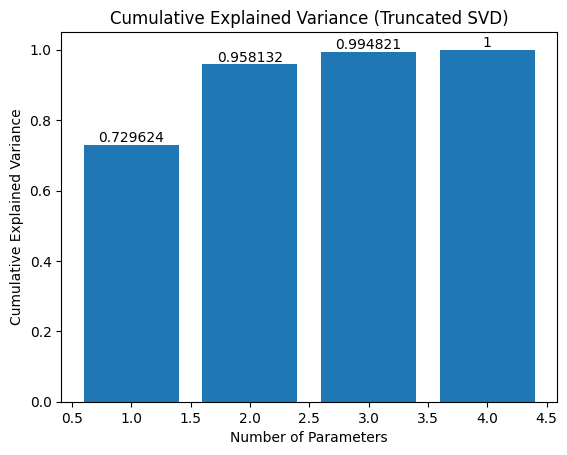

In [ ]:
# Memuat library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

# Memuat dataset iris
iris = datasets.load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

# Menstandarkan data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Melakukan Truncated SVD
svd = TruncatedSVD(n_components=4)  # 4 komponen karena dataset iris punya 4 fitur
svd.fit(data_scaled)

# Memetakan setiap nilai Explained Variance
list_explained_variance_svd = svd.explained_variance_ratio_.cumsum()
label_x = list(range(1, len(list_explained_variance_svd) + 1))

# Membuat grafik batang
fig, ax = plt.subplots()
bars = ax.bar(label_x, list_explained_variance_svd)
ax.bar_label(bars, label_type='edge', color='black')
ax.set_xlabel("Number of Parameters")
ax.set_ylabel("Cumulative Explained Variance")
ax.set_title("Cumulative Explained Variance (Truncated SVD)")
plt.show()


Kode dibawah ini dipakai buat **ngecek korelasi antar komponen hasil SVD**. Dengan `sns.heatmap(data_svd.corr())`, kita bisa lihat apakah **setiap komponen udah saling independen**, di mana idealnya nilai korelasinya kecil atau mendekati nol.

<Axes: >

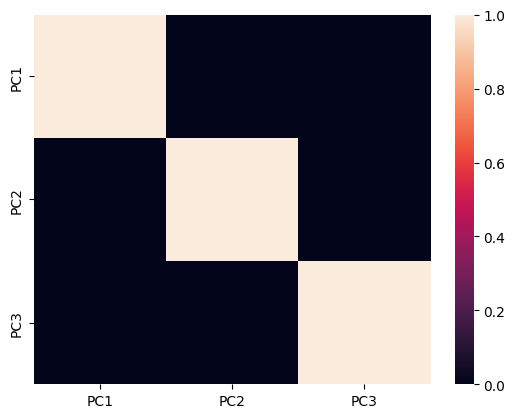

In [ ]:
 # Mengecek korelasi antara parameter hasil svd, yang seharusnya memiliki nilai
 # korelasi yang kecil dari setiap parameter
 sns.heatmap(data_svd.corr())

Kode ini digunakan buat **nampilin sebaran data hasil PCA dalam bentuk 3D**. Dengan `ax.scatter(...)`, titik-titik data diplot berdasarkan tiga komponen utama (`PC1`, `PC2`, `PC3`), jadi kita bisa **lihat pola atau pengelompokan data** di ruang tiga dimensi. Label sumbu ditambah biar jelas tiap komponennya, lalu `plt.show()` buat nampilin grafiknya.

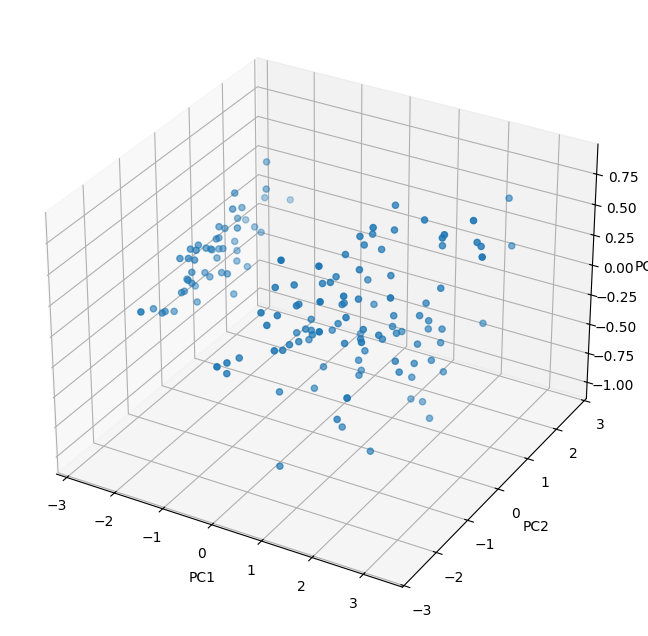

In [ ]:
 # Membuat visualisasi dari sebaran data dengan pertimbangan principle component
 # dalam ruang 3 dimensi
 fig = plt.figure(figsize=(8,8))
 ax = fig.add_subplot(111, projection='3d')
 ax.scatter(data_pca['PC1'], data_pca['PC2'], data_pca['PC3'])
 ax.set_xlabel('PC1')
 ax.set_ylabel('PC2')
 ax.set_zlabel('PC3')
 plt.show()